<a href="https://colab.research.google.com/github/aiaaee/Stochastic-Policy-Iteration-in-Markov-Environments/blob/main/stochastic_policy_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/mimoralea/gym-walk#egg=gym-walk

  Cloning https://github.com/mimoralea/gym-walk to /tmp/pip-install-3_ljk8rb/gym-walk_cf79795fc0f343ed8ad92be6dd5f70e5
  Running command git clone --filter=blob:none --quiet https://github.com/mimoralea/gym-walk /tmp/pip-install-3_ljk8rb/gym-walk_cf79795fc0f343ed8ad92be6dd5f70e5
  Resolved https://github.com/mimoralea/gym-walk to commit b915b94cf2ad16f8833a1ad92ea94e88159279f5
  Preparing metadata (setup.py) ... done
  Created wheel for gym-walk: filename=gym_walk-0.0.2-py3-none-any.whl size=5377 sha256=e3ce8a6e2088cbdfd6e5eeb29e8aae2b3b2e15d65fa2e936265b45ee677b3fa7
  Stored in directory: /tmp/pip-ephem-wheel-cache-srk62ita/wheels/bf/23/e5/a94be4a90dd18f7ce958c21f192276cb01ef0daaf2bc66583b
Successfully built gym-walk


In [29]:
import numpy as np
import warnings
import  gym_walk
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt

In [15]:
LEFT, DOWN, RIGHT, UP = range(4)

In [16]:
env = gym.make('FrozenLake-v1')
P = env.env.env.env.P

In [17]:
P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

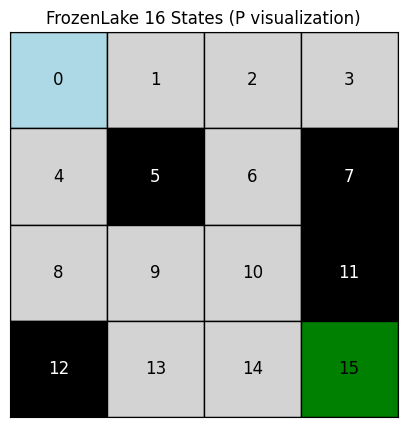

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
color = 'lightgray'
state_num = 0
for i in range(4):
    for j in range(4):
      if i == 0 and j == 0 :
        color = 'lightblue'
        text_color='black'

      elif i == 3 and j == 3 :
        color = 'green'
        text_color='black'

      elif (i == 1 and j == 1) or (i == 1 and j == 3) or (i == 2 and j == 3 ) or (i == 3 and j == 0 ):
        text_color = 'white'
        color='black'
      else :
        color = 'lightgray'
        text_color='black'
      ax.add_patch(plt.Rectangle((j,i), 1 , 1 , edgecolor='black' , facecolor=color))
      ax.text(j+0.5, i+0.5 , str(state_num) , ha='center', va='center', fontsize=12 , color=text_color)
      state_num += 1

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("FrozenLake 16 States (P visualization)")
plt.gca().invert_yaxis()
plt.show()


In [30]:
def Policy_evaluation(pi , P , theta=1e-10 , gamma=1.0):
  prev_V = np.zeros(len(P) , dtype=np.float64)
  while True :
    V = np.zeros(len(P) , dtype=np.float64)
    for s in range(len(P)):
      for prob , next_state , reward , done in P[s][pi(s)] :
        V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))
    if np.max(np.abs(prev_V - V )) < theta :
      break
    prev_V = V.copy()
  return V


def Policy_improvement(V , P , theta=1e-10 , gamma=1.0):
  Q = np.zeros((len(P) , len(P[0])) , dtype=np.float64)
  for s in range(len(P)):
    for a in range(len(P[s])):
      for prob , next_state , reward , done in P[s][a]:
        Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
    best_action = np.argmax(Q , axis=1)
    x = lambda s : best_action[s]
  return x

In [20]:
random_pi = lambda s: {
    0:RIGHT, 1:LEFT, 2:DOWN, 3:UP,
    4:LEFT, 5:LEFT, 6:RIGHT, 7:LEFT,
    8:UP, 9:DOWN, 10:UP, 11:LEFT,
    12:LEFT, 13:RIGHT, 14:DOWN, 15:LEFT
}[s]

In [26]:
V = Policy_evaluation(random_pi , P)
for i , v in enumerate(V):
  print(f'State : {i} --> {v}')

State : 0 --> 0.11764705786064777
State : 1 --> 0.05882352886815158
State : 2 --> 0.05882352878895475
State : 3 --> 0.05882352860424482
State : 4 --> 0.1764705870733909
State : 5 --> 0.0
State : 6 --> 0.058823529036927696
State : 7 --> 0.0
State : 8 --> 0.23529411655190463
State : 9 --> 0.29411764628092096
State : 10 --> 0.11764705840756756
State : 11 --> 0.0
State : 12 --> 0.0
State : 13 --> 0.5294117640612261
State : 14 --> 0.7647058819889883
State : 15 --> 0.0


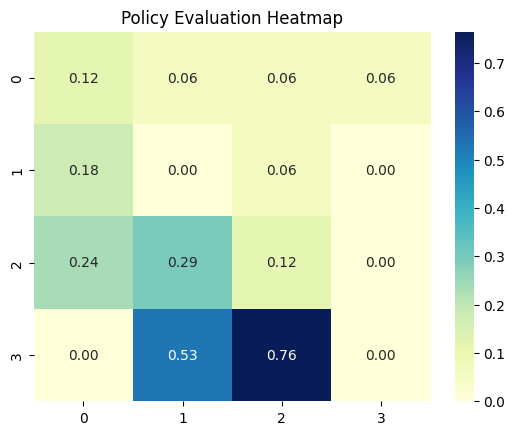

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [28]:
V_grid = V.reshape(4, 4)
sns.heatmap(V_grid, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Policy Evaluation Heatmap")
plt.show()

In [44]:
best_action = Policy_improvement(V , P )
policy_arr = []
for s in range(len(P)):
  policy_arr.append(best_action(s))
  print(f'in state : {s} --> Action : {best_action(s)}')

in state : 0 --> Action : 0
in state : 1 --> Action : 3
in state : 2 --> Action : 0
in state : 3 --> Action : 3
in state : 4 --> Action : 0
in state : 5 --> Action : 0
in state : 6 --> Action : 0
in state : 7 --> Action : 0
in state : 8 --> Action : 3
in state : 9 --> Action : 1
in state : 10 --> Action : 0
in state : 11 --> Action : 0
in state : 12 --> Action : 0
in state : 13 --> Action : 2
in state : 14 --> Action : 1
in state : 15 --> Action : 0


In [46]:
actions = ['←', '↓', '→', '↑']
grid_policy = np.array([actions[a] for a in policy_arr]).reshape(4,4)
print(grid_policy)

[['←' '↑' '←' '↑']
 ['←' '←' '←' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]
